<a href="https://colab.research.google.com/github/Ahad4200/Julia_Flux_jl_Neural_Network_Implementation/blob/main/Julia_Flux_jl_Neural_Network_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install required packages
using Pkg
Pkg.add(["Flux", "MLDatasets", "Plots", "Statistics", "Random", "ProgressMeter", "MLBase", "CUDA"])
Pkg.add("ConfusionMatrices")  # This might need to be added separately

   Resolving package versions...
   Installed ZipFile ──────────────── v0.10.1
   Installed JLD2 ─────────────────── v0.5.13
   Installed AtomsBase ────────────── v0.5.1
   Installed MAT ──────────────────── v0.10.7
   Installed MLBase ───────────────── v0.9.2
   Installed GZip ─────────────────── v0.6.2
   Installed LLVM ─────────────────── v9.4.0
   Installed Hwloc_jll ────────────── v2.12.1+0
   Installed MicrosoftMPI_jll ─────── v10.1.4+3
   Installed StringEncodings ──────── v0.3.7
   Installed MPIPreferences ───────── v0.1.11
   Installed Random123 ────────────── v1.7.1
   Installed BufferedStreams ──────── v1.2.2
   Installed Glob ─────────────────── v1.3.1
   Installed HDF5_jll ─────────────── v1.14.6+0
   Installed MPICH_jll ────────────── v4.3.0+1
   Installed StructTypes ──────────── v1.11.0
   Installed JSON3 ────────────────── v1.14.2
   Installed DataDeps ─────────────── v0.7.13
   Installed StridedViews ─────────── v0.2.2
   Installed LLVMExtra_jll ────────── v0.0.36+0
 

LoadError: The following package names could not be resolved:
 * ConfusionMatrices (not found in project, manifest or registry)

CUDA is available but not functional, using CPU
Training data shape: (28, 28, 60000), (60000,)
Test data shape: (28, 28, 10000), (10000,)
Chain(Dense(784 => 256, relu), Dropout(0.2), Dense(256 => 128, relu), Dropout(0.2), Dense(128 => 10), softmax)
Epoch 1: Train Loss = 1.1033, Train Accuracy = 0.6941, Test Loss = 0.4925, Test Accuracy = 0.863


Training...  20%|████████                                |  ETA: 0:00:35

Epoch 2: Train Loss = 0.456, Train Accuracy = 0.8842, Test Loss = 0.349, Test Accuracy = 0.8973


Training...  30%|████████████                            |  ETA: 0:00:36

Epoch 3: Train Loss = 0.3645, Train Accuracy = 0.9069, Test Loss = 0.2898, Test Accuracy = 0.9145


Training...  40%|████████████████                        |  ETA: 0:00:34

Epoch 4: Train Loss = 0.3138, Train Accuracy = 0.9186, Test Loss = 0.2555, Test Accuracy = 0.9232


Training...  50%|████████████████████                    |  ETA: 0:00:30

Epoch 5: Train Loss = 0.2759, Train Accuracy = 0.9284, Test Loss = 0.2215, Test Accuracy = 0.9306


Training...  60%|████████████████████████                |  ETA: 0:00:25

Epoch 6: Train Loss = 0.2452, Train Accuracy = 0.9367, Test Loss = 0.1985, Test Accuracy = 0.9403


Training...  70%|████████████████████████████            |  ETA: 0:00:19

Epoch 7: Train Loss = 0.2194, Train Accuracy = 0.944, Test Loss = 0.1855, Test Accuracy = 0.9445


Training...  80%|████████████████████████████████        |  ETA: 0:00:13

Epoch 8: Train Loss = 0.2002, Train Accuracy = 0.9501, Test Loss = 0.1679, Test Accuracy = 0.9478


Training...  90%|████████████████████████████████████    |  ETA: 0:00:07

Epoch 9: Train Loss = 0.1812, Train Accuracy = 0.955, Test Loss = 0.1553, Test Accuracy = 0.9525


Training... 100%|████████████████████████████████████████| Time: 0:01:07


Epoch 10: Train Loss = 0.1664, Train Accuracy = 0.959, Test Loss = 0.1389, Test Accuracy = 0.9576


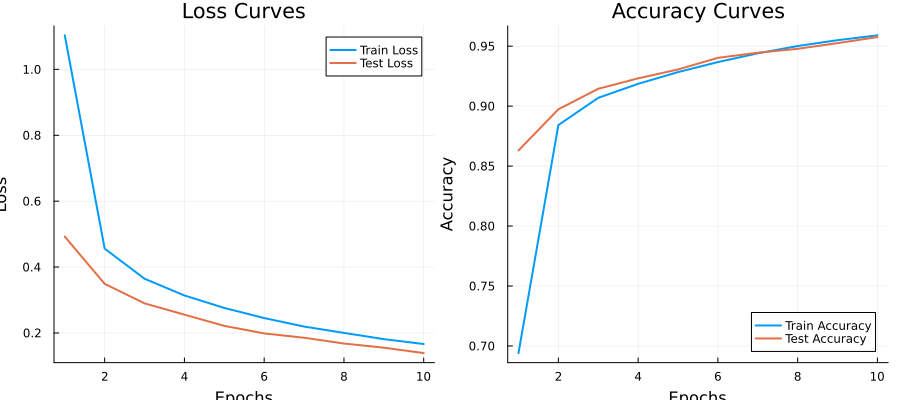


Confusion Matrix:


10×10 Matrix{Int64}:
 967     0    1    1    0    3    6    1    1    0
   0  1118    2    2    0    1    3    1    8    0
   9     3  982    7    5    0    7    9    9    1
   0     1   14  952    0   15    0   12   13    3
   0     1    4    0  919    1   10    2    2   43
   6     1    0    8    2  852    7    0   10    6
   7     3    0    0    5    9  928    0    6    0
   2    13   11    6    1    0    0  977    1   17
   4     3    3    8    4   14    7    6  921    4
   8     6    1    8   13    6    0    5    7  955


Per-class accuracy:
Class 0: 0.9867
Class 1: 0.985
Class 2: 0.9516
Class 3: 0.9426
Class 4: 0.9358
Class 5: 0.9552
Class 6: 0.9687
Class 7: 0.9504
Class 8: 0.9456
Class 9: 0.9465

Overall Test Accuracy: 0.9571

----- Report: Flux.jl for Deep Learning -----
Flux.jl simplifies deep learning in Julia through several key features:

1. Intuitive API: The Chain and Dense abstractions provide a clean, intuitive way to build neural networks.

2. Automatic Differentiation: Flux leverages Zygote.jl for automatic differentiation, eliminating the need to manually implement backpropagation.

3. GPU Acceleration: Models can be easily moved to GPU using the gpu() function, allowing for faster computation.

4. Easy Batching: Flux.DataLoader provides utilities for batching and data loading, making it easy to work with mini-batches.

5. Composability: Flux models can be composed with other Julia functions, allowing for flexible model architectures.

6. Customizability: Easy to define custom layers, los

In [16]:
# Updated Flux.jl Neural Network Implementation for Google Colab
# This version uses the latest Flux API (as of May 2025)

using Flux
using Flux: onehotbatch, onecold, crossentropy
using MLDatasets: MNIST
using Plots
using Statistics
using Random
using ProgressMeter

# Set a random seed for reproducibility
Random.seed!(42)

# Try to use CUDA if available
try
    using CUDA
    if CUDA.functional()
        println("CUDA is available, GPU acceleration enabled")
    else
        println("CUDA is available but not functional, using CPU")
    end
catch
    println("CUDA not available, using CPU")
end

# Load the MNIST dataset with updated syntax
train_x, train_y = MNIST(split=:train)[:]
test_x, test_y = MNIST(split=:test)[:]

# Check the shapes of our data
println("Training data shape: $(size(train_x)), $(size(train_y))")
println("Test data shape: $(size(test_x)), $(size(test_y))")

# Reshape the data to be in the format expected by Flux
# MNIST images are 28x28 grayscale, we flatten them to vectors
train_x = reshape(train_x, :, size(train_x, 3))
test_x = reshape(test_x, :, size(test_x, 3))

# Normalize the data to [0, 1] range
train_x = Float32.(train_x ./ 255)
test_x = Float32.(test_x ./ 255)

# Convert labels to one-hot encoding
train_y_onehot = onehotbatch(train_y, 0:9)
test_y_onehot = onehotbatch(test_y, 0:9)

# Create data loaders (mini-batches) with updated syntax
batch_size = 128
train_data = Flux.DataLoader((train_x, train_y_onehot), batchsize=batch_size, shuffle=true)
test_data = Flux.DataLoader((test_x, test_y_onehot), batchsize=batch_size)

# Define a feed-forward neural network
model = Chain(
    Dense(784, 256, relu),    # 28×28 = 784 input features, 256 hidden neurons, ReLU activation
    Dropout(0.2),             # Dropout with 20% probability
    Dense(256, 128, relu),    # 128 hidden neurons in second layer, ReLU activation
    Dropout(0.2),             # Dropout with 20% probability
    Dense(128, 10),           # 10 output classes (digits 0-9)
    softmax                   # Softmax activation for classification
)

# Try to move model to GPU if available
try
    if CUDA.functional()
        model = model |> gpu
        train_data = [(x |> gpu, y |> gpu) for (x, y) in train_data]
        test_data = [(x |> gpu, y |> gpu) for (x, y) in test_data]
        println("Model moved to GPU")
    end
catch
    println("Running on CPU")
end

# Print the model architecture
println(model)

# Loss function: cross-entropy
loss(x, y) = Flux.crossentropy(model(x), y)

# Accuracy function
function accuracy(x, y)
    ŷ = model(x)
    return mean(onecold(ŷ) .== onecold(y))
end

# Define optimizer with updated syntax
opt = Adam(0.001)
# Setup the optimizer with the model parameters
opt_state = Flux.setup(opt, model)

# Number of epochs
epochs = 10

# Initialize arrays to store metrics
train_losses = Float32[]
train_accuracies = Float32[]
test_losses = Float32[]
test_accuracies = Float32[]

# Training loop with updated syntax
@showprogress "Training..." for epoch in 1:epochs
    # Training
    local train_loss = 0.0
    local train_acc = 0.0
    local batch_count = 0

    for (x, y) in train_data
        # Calculate gradients with updated syntax
        loss_value, grads = Flux.withgradient(model) do m
            l = Flux.crossentropy(m(x), y)
            return l
        end

        # Update parameters with gradients using new API
        Flux.update!(opt_state, model, grads[1])

        # Add to running loss
        train_loss += loss_value

        # Calculate accuracy
        train_acc += accuracy(x, y)
        batch_count += 1
    end

    # Average loss and accuracy
    train_loss /= batch_count
    train_acc /= batch_count
    push!(train_losses, train_loss)
    push!(train_accuracies, train_acc)

    # Evaluation on test set
    local test_loss = 0.0
    local test_acc = 0.0
    local test_batch_count = 0

    for (x, y) in test_data
        test_loss += loss(x, y)
        test_acc += accuracy(x, y)
        test_batch_count += 1
    end

    test_loss /= test_batch_count
    test_acc /= test_batch_count
    push!(test_losses, test_loss)
    push!(test_accuracies, test_acc)

    # Print progress
    println("Epoch $epoch: Train Loss = $(round(train_loss, digits=4)), Train Accuracy = $(round(train_acc, digits=4)), Test Loss = $(round(test_loss, digits=4)), Test Accuracy = $(round(test_acc, digits=4))")
end

# Plotting the learning curves
p1 = plot(1:epochs, train_losses, label="Train Loss", title="Loss Curves", xlabel="Epochs", ylabel="Loss", lw=2)
plot!(p1, 1:epochs, test_losses, label="Test Loss", lw=2)

p2 = plot(1:epochs, train_accuracies, label="Train Accuracy", title="Accuracy Curves", xlabel="Epochs", ylabel="Accuracy", lw=2)
plot!(p2, 1:epochs, test_accuracies, label="Test Accuracy", lw=2)

p = plot(p1, p2, layout=(1, 2), size=(900, 400))
display(p)

# Generate predictions for the test set
test_preds = []
test_actual = []

for (x, y) in test_data
    batch_preds = onecold(model(x)) .- 1  # Subtract 1 to match MNIST digit labels (0-9)
    batch_actual = onecold(y) .- 1

    # Move to CPU if on GPU
    if x isa CUDA.CuArray
        batch_preds = batch_preds |> cpu
        batch_actual = batch_actual |> cpu
    end

    append!(test_preds, batch_preds)
    append!(test_actual, batch_actual)
end

# Create a simple confusion matrix without the ConfusionMatrices package
function confusion_matrix(actual, predicted, n_classes)
    cm = zeros(Int, n_classes, n_classes)
    for (a, p) in zip(actual, predicted)
        cm[a+1, p+1] += 1  # +1 because Julia is 1-indexed
    end
    return cm
end

# Calculate and display the confusion matrix
cm = confusion_matrix(test_actual, test_preds, 10)
println("\nConfusion Matrix:")
display(cm)

# Calculate per-class accuracy
class_accuracy = [cm[i,i] / sum(cm[i,:]) for i in 1:10]
println("\nPer-class accuracy:")
for i in 1:10
    println("Class $(i-1): $(round(class_accuracy[i], digits=4))")
end

# Calculate overall accuracy
final_accuracy = sum(cm[i,i] for i in 1:10) / sum(cm)
println("\nOverall Test Accuracy: $(round(final_accuracy, digits=4))")

# Print out the report
println("\n----- Report: Flux.jl for Deep Learning -----")
println("""
Flux.jl simplifies deep learning in Julia through several key features:

1. Intuitive API: The Chain and Dense abstractions provide a clean, intuitive way to build neural networks.

2. Automatic Differentiation: Flux leverages Zygote.jl for automatic differentiation, eliminating the need to manually implement backpropagation.

3. GPU Acceleration: Models can be easily moved to GPU using the gpu() function, allowing for faster computation.

4. Easy Batching: Flux.DataLoader provides utilities for batching and data loading, making it easy to work with mini-batches.

5. Composability: Flux models can be composed with other Julia functions, allowing for flexible model architectures.

6. Customizability: Easy to define custom layers, loss functions, and training loops.

7. Integration with Julia Ecosystem: Seamlessly works with Julia's plotting libraries, statistics packages, and more.

The Julia language itself adds benefits like just-in-time compilation for speed, a rich type system, multiple dispatch, and a comprehensive package ecosystem.
""")